In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, train_test_split
import tensorflow as tf

In [12]:
df=pd.read_csv("BankNote_Authentication.csv")
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [13]:
features=["variance","skewness","curtosis","entropy"]
X=df[features]
y=df["class"] # already labeled

# Split dataset to train and test set 75%-25%
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25,random_state=0)

In [52]:
def create_nn():
    '''
    Creates simple Multilayer perceptron model.
    '''
    # model Layers
    model=Sequential()
    model.add(Dense(16,activation='relu',input_shape=(4,)))
    model.add(Dense(1,activation='sigmoid'))
    
    #Compile model
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=["accuracy"])
    return model

In [53]:
model=create_nn()
print(model.summary())

# 97= (16 * (4+1) + 1 * (16+1))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 17        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
None


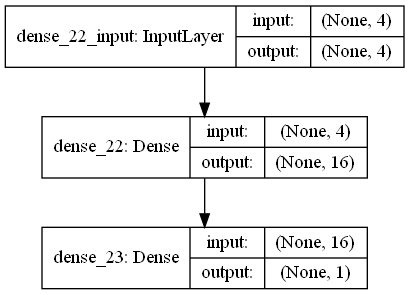

In [54]:
tf.keras.utils.plot_model(model,show_shapes=True,show_layer_names=True)

In [55]:
# estimators
estimators=[]
estimators.append(('standarize',StandardScaler()))
estimators.append(('mlp',KerasClassifier(build_fn=create_nn,epochs=50,
                                         batch_size=5,verbose=2)))
# Pipeline
pipeline=Pipeline(estimators)
# 5-Fold cross validation
kfold=StratifiedKFold(n_splits=5,shuffle=True)


In [59]:
fitted=pipeline.fit(X_train,y_train)

Epoch 1/50
 - 0s - loss: 0.6521 - accuracy: 0.7366
Epoch 2/50
 - 0s - loss: 0.3930 - accuracy: 0.9261
Epoch 3/50
 - 0s - loss: 0.2312 - accuracy: 0.9572
Epoch 4/50
 - 0s - loss: 0.1461 - accuracy: 0.9747
Epoch 5/50
 - 0s - loss: 0.1009 - accuracy: 0.9767
Epoch 6/50
 - 0s - loss: 0.0756 - accuracy: 0.9815
Epoch 7/50
 - 0s - loss: 0.0605 - accuracy: 0.9845
Epoch 8/50
 - 0s - loss: 0.0509 - accuracy: 0.9835
Epoch 9/50
 - 0s - loss: 0.0438 - accuracy: 0.9883
Epoch 10/50
 - 0s - loss: 0.0386 - accuracy: 0.9903
Epoch 11/50
 - 0s - loss: 0.0343 - accuracy: 0.9893
Epoch 12/50
 - 0s - loss: 0.0309 - accuracy: 0.9903
Epoch 13/50
 - 0s - loss: 0.0281 - accuracy: 0.9913
Epoch 14/50
 - 0s - loss: 0.0256 - accuracy: 0.9922
Epoch 15/50
 - 0s - loss: 0.0235 - accuracy: 0.9922
Epoch 16/50
 - 0s - loss: 0.0215 - accuracy: 0.9951
Epoch 17/50
 - 0s - loss: 0.0197 - accuracy: 1.0000
Epoch 18/50
 - 0s - loss: 0.0183 - accuracy: 1.0000
Epoch 19/50
 - 0s - loss: 0.0168 - accuracy: 1.0000
Epoch 20/50
 - 0s - l

In [64]:
score=pipeline.score(X_test,y_test)
print("Test Score: ",score)

Test Score:  1.0


Because of the quality (not evaluated) and size of the data we can reach 100% accuracy on train and test sets.

In [67]:
#save picle
import joblib
joblib.dump(pipeline,'pipeline.pkl')

['pipeline.pkl']

In [68]:
#Check everything works fine
pip=joblib.load('pipeline.pkl')
pip.predict([[3.62160,8.6661,-2.8073,-0.44699]])

array([[0]], dtype=int64)